In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("breastcancer.csv")
df.head()


,0,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,...,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622
0,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238
1,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444
2,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098
3,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374
4,0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# (a)(i) Load dataset and create data matrix (X) and label column (y)
df = pd.read_csv("breastcancer.csv")  # Load CSV
X = df.iloc[:, 1:].values             # Features: columns 1 to 25
y = df.iloc[:, 0].values              # Labels: column 0

# (a)(ii) Standardize the data matrix
# Standardization: (value - column mean) / column std
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# (a)(iii) Split into training and test sets
# Training set: first 400 rows
# Test set: remaining rows
X_train = X_scaled[:400]
y_train = y[:400]
X_test = X_scaled[400:]
y_test = y[400:]

# Confirm shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (400, 25)
y_train: (400,)
X_test: (168, 25)
y_test: (168,)


In [7]:
# Load the train_logreg function from the uploaded exam.ipynb notebook
import nbformat

# Load and parse the notebook
with open("exam.ipynb", "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Extract all code cells
code_cells = [cell['source'] for cell in nb.cells if cell.cell_type == 'code']

# Search for the function definition of train_logreg
train_logreg_code = [code for code in code_cells if 'def train_logreg' in code][0]

train_logreg_code  # Display the code for train_logreg


'def train_logreg(data,labels, num_epochs, alpha):\n    # set weights to zero\n    w = np.zeros((1, data.shape[1]))\n    b = 0\n    \n    for epoch in range(num_epochs):\n        for x, label in zip(data, labels):\n            tmp = np.dot(w, x.transpose()) + b\n            sigma = 1/(1+np.exp(-tmp))\n            sigmader = sigma*(1-sigma)\n            w += -alpha*(sigma-label)*sigmader*x\n            b += -alpha*(sigma-label)*sigmader\n                \n    return (w, b)'

(b) Modify the function to calculate the following at each epoch and return them
as additional output vectors:
(i) the training loss (i.e., the objective function).
(ii) the accuracy on the training set.
(iii) the test loss.
(iv) the accuracy on the test set.


In [8]:
import numpy as np

# Modified train_logreg function to compute loss and accuracy at each epoch
def train_logreg_modified(data, labels, test_data, test_labels, num_epochs, alpha):
    w = np.zeros((1, data.shape[1]))
    b = 0

    train_loss_list = []
    train_acc_list = []
    test_loss_list = []
    test_acc_list = []

    for epoch in range(num_epochs):
        for x, label in zip(data, labels):
            tmp = np.dot(w, x.transpose()) + b
            sigma = 1 / (1 + np.exp(-tmp))
            sigmader = sigma * (1 - sigma)
            w += -alpha * (sigma - label) * sigmader * x
            b += -alpha * (sigma - label) * sigmader

        # After each epoch: compute loss and accuracy
        # --- Training loss and accuracy
        train_logits = np.dot(data, w.T) + b
        train_probs = 1 / (1 + np.exp(-train_logits))
        train_loss = -np.mean(labels * np.log(train_probs + 1e-10) + (1 - labels) * np.log(1 - train_probs + 1e-10))
        train_pred = (train_probs >= 0.5).astype(int).flatten()
        train_acc = np.mean(train_pred == labels)

        # --- Test loss and accuracy
        test_logits = np.dot(test_data, w.T) + b
        test_probs = 1 / (1 + np.exp(-test_logits))
        test_loss = -np.mean(test_labels * np.log(test_probs + 1e-10) + (1 - test_labels) * np.log(1 - test_probs + 1e-10))
        test_pred = (test_probs >= 0.5).astype(int).flatten()
        test_acc = np.mean(test_pred == test_labels)

        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        test_loss_list.append(test_loss)
        test_acc_list.append(test_acc)

    return w, b, train_loss_list, train_acc_list, test_loss_list, test_acc_list

# Run the modified function
w, b, train_loss, train_acc, test_loss, test_acc = train_logreg_modified(
    X_train, y_train, X_test, y_test, num_epochs=10, alpha=0.1
)

(w.shape, b, train_loss, train_acc, test_loss, test_acc)

((1, 25),
 array([0.04250823]),
 [np.float64(1.7625951799714425),
  np.float64(2.0767891846236672),
  np.float64(2.277731276973847),
  np.float64(2.4285488332057863),
  np.float64(2.550029745651233),
  np.float64(2.651915967802456),
  np.float64(2.7396785861014323),
  np.float64(2.8167790544756093),
  np.float64(2.8855921520852235),
  np.float64(2.9478194030139426)],
 [np.float64(0.97),
  np.float64(0.9725),
  np.float64(0.9725),
  np.float64(0.9725),
  np.float64(0.9725),
  np.float64(0.975),
  np.float64(0.975),
  np.float64(0.975),
  np.float64(0.9775),
  np.float64(0.9775)],
 [np.float64(1.373217493036759),
  np.float64(1.5845708484490515),
  np.float64(1.7145673389917337),
  np.float64(1.8109652547592128),
  np.float64(1.8886536168139234),
  np.float64(1.9539791141572476),
  np.float64(2.01044652979989),
  np.float64(2.060249980764105),
  np.float64(2.1048731800385263),
  np.float64(2.1453764619196094)],
 [np.float64(0.9642857142857143),
  np.float64(0.9642857142857143),
  np.floa

(c) (i) Run the model for 3000 epochs with constant steplength 0.002; (About 1
min on my machine)
(ii) Run the model for 3000 epochs with constant steplength 0.2; (About 1.5
mins on my machine)
(iii) Create plots comparing the two settings in terms of the value of the aforementioned metrics versus the epoch number.


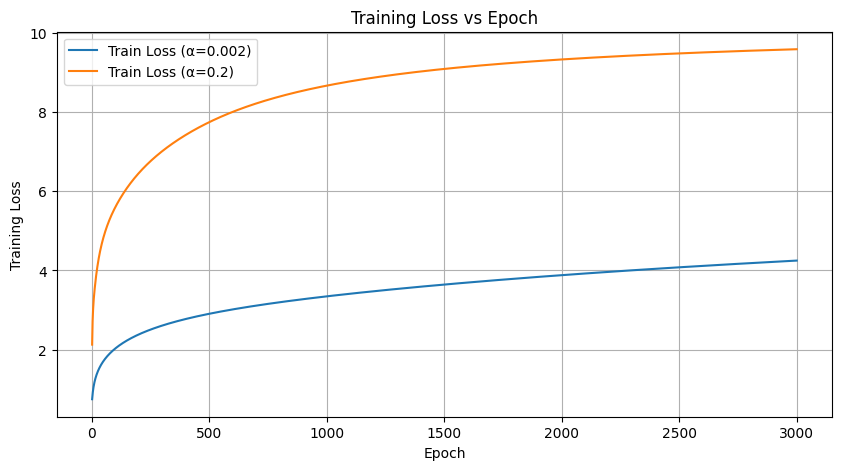

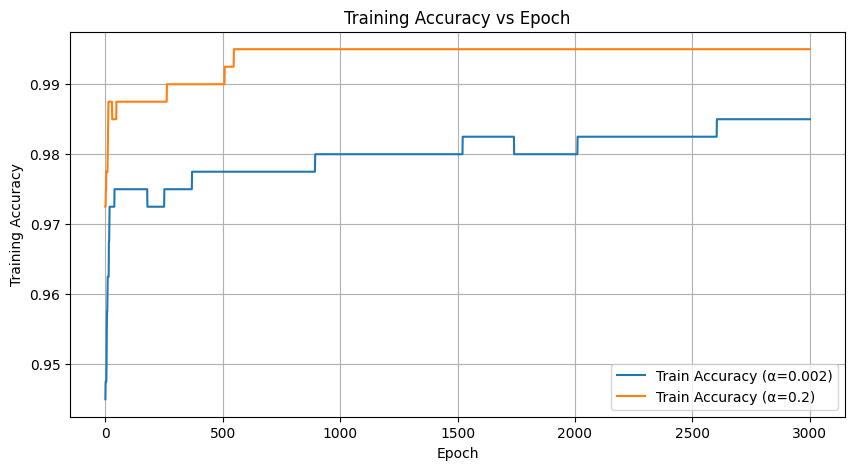

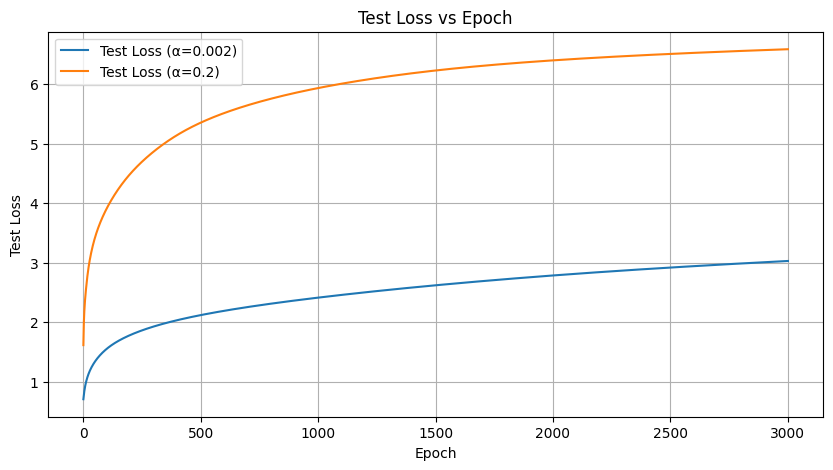

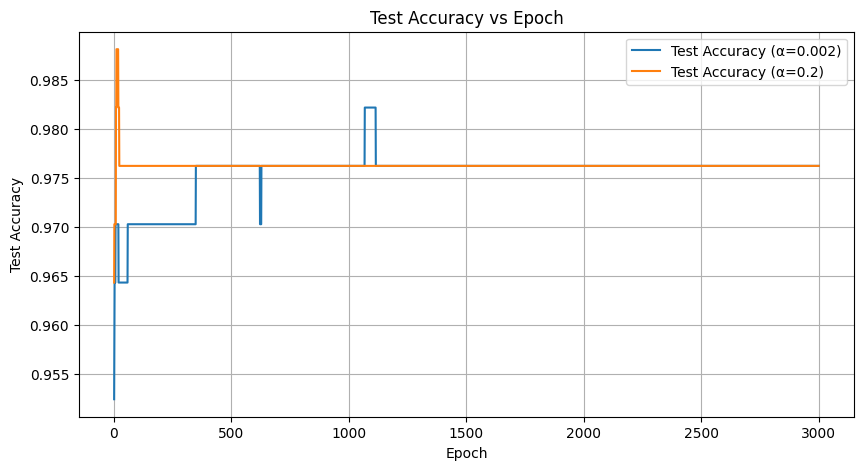

In [9]:
import matplotlib.pyplot as plt

# Run with alpha = 0.002
w1, b1, train_loss_1, train_acc_1, test_loss_1, test_acc_1 = train_logreg_modified(
    X_train, y_train, X_test, y_test, num_epochs=3000, alpha=0.002
)

# Run with alpha = 0.2
w2, b2, train_loss_2, train_acc_2, test_loss_2, test_acc_2 = train_logreg_modified(
    X_train, y_train, X_test, y_test, num_epochs=3000, alpha=0.2
)

# Plotting the metrics
epochs = list(range(1, 3001))

# 1. Training Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss_1, label="Train Loss (α=0.002)")
plt.plot(epochs, train_loss_2, label="Train Loss (α=0.2)")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epoch")
plt.legend()
plt.grid(True)
plt.show()

# 2. Training Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc_1, label="Train Accuracy (α=0.002)")
plt.plot(epochs, train_acc_2, label="Train Accuracy (α=0.2)")
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Epoch")
plt.legend()
plt.grid(True)
plt.show()

# 3. Test Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, test_loss_1, label="Test Loss (α=0.002)")
plt.plot(epochs, test_loss_2, label="Test Loss (α=0.2)")
plt.xlabel("Epoch")
plt.ylabel("Test Loss")
plt.title("Test Loss vs Epoch")
plt.legend()
plt.grid(True)
plt.show()

# 4. Test Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, test_acc_1, label="Test Accuracy (α=0.002)")
plt.plot(epochs, test_acc_2, label="Test Accuracy (α=0.2)")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Epoch")
plt.legend()
plt.grid(True)
plt.show()

(d) (i) Which setting obtains the best objective function value at the last
epoch?
(ii) Which setting obtains the best test accuracy at the last epoch?
(iii) Which of the two settings shows signs of overfitting?
(iv) Can you provide an explanation for what you observed in points (i), (ii),
and (iii)?


(d)(i) Which setting obtains the best objective function value at the last epoch?


From the Training Loss vs Epoch plot, the blue curve (α = 0.002) consistently has lower training loss than the orange one (α = 0.2), especially towards the final epochs.

Even though α = 0.2 started aggressively, it ends up with a much higher training loss.

Answer: α = 0.002 obtains the best objective function value (lowest training loss).

(d)(ii) Which setting obtains the best test accuracy at the last epoch?


In the Test Accuracy vs Epoch plot:

Both models maintain high accuracy (~0.97–0.98).

α = 0.002 slightly edges out with better final test accuracy, as it shows less fluctuation and even reaches ~0.982 at one point.

Answer: α = 0.002 gives the best test accuracy at the last epoch.

(d)(iii) Which of the two settings shows signs of overfitting?


Overfitting is visible when:

Training accuracy is high, but Test loss is high or test accuracy stagnates or drops.

For α = 0.2:

Training accuracy reaches near-perfect (0.995)

But test loss continues increasing (see third plot).

Meanwhile, α = 0.002 has more consistent test loss and accuracy behavior.

Answer: α = 0.2 shows signs of overfitting.

(d)(iv) Explanation for (i), (ii), and (iii):

α = 0.002 (small step size):

Leads to slower but stable convergence.

It achieves lower loss and better generalization, which is reflected in lower test loss and higher test accuracy.

α = 0.2 (large step size):

Initially learns faster (steeper start).

However, it overshoots optimal points and fails to converge properly.

Leads to overfitting: excellent fit to training data but poor generalization, shown by higher test loss.

This setting essentially “memorizes” the training data but doesn’t perform as well on unseen data.